In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.io
import pandas as pd
from IPython.display import display
from ipywidgets import interact, fixed
import thinkdsp as tdsp

def graph_size(n):
    """Função auxiliar para definir tamanho dos gráficos"""
    return (n*(1+5**0.5)/2, n)

@interact(xi0=(0,100,10))

def fourier(k=0, xi0=0):
    omega = lambda f: 2*np.pi*f
    t = np.linspace(-5/100, 5/100, 1000)
    ft = 10 * np.cos(omega(100)*t+np.pi/3)
#     ft = ft - np.mean(ft) + k # retirando a polarização contínua original da onda e aplicando k
    xi = np.linspace(0, 100, 1000)
    integrand = ft*np.exp(-1j*2*np.pi*t*xi0) #psi, que é uma freq
    fig = plt.figure(figsize=graph_size(7))
    plt.subplot(311)
    plt.title('Parte real do integrando (área sob a curva)')
    plt.plot(t, np.real(integrand))
    plt.fill_between(t, np.real(integrand), color='gray')
    plt.ylim(-10,10)
    plt.axis('off')
    plt.subplot(312) # precisei mudar de box_aspect para aspect
    plt.title('Integrando complexo, órbitas e centróide')
    plt.axhline(y=0, color='gray')
    plt.axvline(x=0, color='gray')
    plt.plot(np.real(integrand), np.imag(integrand))
    centroid = np.mean(integrand)
    plt.scatter(np.real(centroid), np.imag(centroid), 144, marker='*', color='r', zorder=5)
    plt.plot([0, np.real(centroid)], [0, np.imag(centroid)], 'r')
    plt.axis('equal')
    plt.xlim(-3,3)
    plt.ylim(-10,10)
    plt.axis('off')
    plt.subplot(313)
    plt.title('Parte imaginária do integrando')
    plt.plot(t, np.imag(integrand))
    plt.fill_between(t, np.imag(integrand), color='gray')
    plt.ylim(-10,10)
    plt.axis('off')
    plt.show()
    print(centroid)
    print(5*np.exp(-1j*np.pi/3))

interactive(children=(IntSlider(value=0, description='k', max=1), IntSlider(value=0, description='xi0', step=1…

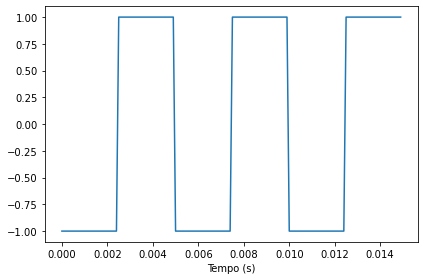

In [2]:
from thinkdsp import SquareSignal

signal = SquareSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
tdsp.decorate(xlabel='Tempo (s)')

wave_squar = signal.make_wave(duration=0.5, framerate=10000)
wave = wave_squar
wave.apodize()
wave.make_audio()

In [3]:
@interact(f0=fixed(1100), sr=fixed(10000), zoom=(0.001, 1, 0.0005))
def aliasing_detail(f0, sr, zoom=1):
    signal = SquareSignal(f0)
    segment = signal.make_wave(duration=0.5, framerate=sr)
    spectrum = segment.make_spectrum()
    spectrum.scale(2/len(segment))
    nyquist = sr/2
    freqs, amps = [], []
    for k in range(0, 30):
        amps.append(np.abs((-1)**k/(2*k+1)**2))
        aux = (2*k+1)*f0
        fr = aux % nyquist
        if (aux//nyquist) % 2 == 1:
            fr = nyquist - fr
        freqs.append(fr)
    plt.figure(figsize=graph_size(7))
    spectrum.plot()
    plt.plot(freqs, amps, ':*r')
    tdsp.decorate(xlabel='Frequency (Hz)', ylim=[0, zoom], xlim=[0,nyquist])
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='zoom', max=1.0, min=0.001, step=0.0005), Output()), …

## **Código sobre correlação de sinais e espectro na freq**

In [4]:
from thinkdsp import CosSignal

@interact(log_log=False, zoom=(1000,20000,1000))
def logspectrum(log_log, zoom=15000):
    signal = CosSignal(freq=2664)
    wave = signal.make_wave(duration=0.002, framerate=30000)
    spectrum = wave.make_spectrum()
    spectrum.scale(2/len(wave))
    spectrum.hs[0] = 0 # evitando o extremo negativo de uma componente pequena em escala logarítmica
    plt.figure(figsize=graph_size(7))
    spectrum.plot_power(marker='o')
    if log_log:
        tdsp.decorate(xlabel="log Frequência (Hz)", ylabel="log Potência", xscale='log', yscale='log')
    else:
        tdsp.decorate(xlabel="Frequência (Hz)", ylabel="Potência", xlim=[0,zoom])

interactive(children=(Checkbox(value=False, description='log_log'), IntSlider(value=15000, description='zoom',…

In [5]:
def autocorr(wave):
    lags = range(len(wave.ys)//2)
    corrs = [serial_corr(wave, lag) for lag in lags]
    return lags, corrs

In [6]:
wave = CosSignal(freq=2664).make_wave(duration=0.002, framerate=30000)
@interact(wave=fixed(wave), zoom=(1000,20000,1000))
def spectrogram_sound(wave, zoom=20000):
    spectogram = wave.make_spectrogram(seg_length=512)
    plt.figure(figsize=graph_size(7))
    spectogram.plot()
    tdsp.decorate(xlabel='Tempo (s)', ylabel='Frequência (Hz)', ylim=[0,zoom])

interactive(children=(IntSlider(value=20000, description='zoom', max=20000, min=1000, step=1000), Output()), _…

<Figure size 815.489x504 with 0 Axes>

In [7]:
# onda amostrada
xn_tdsp = [ 0, 0, 0, 1, 1, 8, 1, 1, 0, 0, 1, 0, 0, 0 ]

    
# DFT, ajustes e outros cálculos para espectro
spectrum = xn_tdsp.make_spectrum()
spectrum.scale(2/N) # para ver as amplitudes na proporção correta

# visualizações
print_some_elements(spectrum.hs, n=6, starts_with="Xk = ")
print_some_elements(spectrum.amps, starts_with="hs = ")
print_some_elements(spectrum.fs, starts_with="fs = ")

plt.figure(figsize=graph_size(5))
spectrum.plot()
plt.xlabel("Frequência (Hz)", fontsize=14)
plt.ylabel("Xk, amplitudes das magnitudes", fontsize=14)
plt.grid('on');

AttributeError: 'list' object has no attribute 'make_spectrum'